# Set 2, Problem 3

## Field Color Magnitude Diagram

The goal of this problem is to make a color magnitude diagram for all stars within a certain distance using Gaia data.

### (a) Make a CMD ($BP − RP$ vs. $M_{G}$).

Select the subset of all stars within 25 pc from Gaia with good colors (S/N in the blue and red bands ≥ 5) and excellent parallaxes (S/N > 20).

In [12]:
# Compute the parallax (in mas) corresponding to 25 pc
parallax = 1000./(25.)
print(parallax)

40.0


Download from the Gaia archive at https://gea.esac.esa.int/archive/. Make sure you download all the necessary data for the steps below. You'll need the following: ra, dec, parallax, phot_g_mean_mag, bp_rp, teff_val, lum_val

(if considering extinction corrections, also need: a_g_val, e_bp_min_rp_val)

I've saved all stars to a file called 'gaia_25pc.csv'

In [13]:
# Load the file with data
import pandas as pd
import numpy as np

data = pd.read_csv('gaia_25pc.csv')

In [14]:
# Get rid of any stars that don't have all the measurements we need
data = data[~np.isnan(data['parallax'])]
data = data[~np.isnan(data['phot_g_mean_mag'])]

# In case we want to consider reddening/extinction
'''
data = data[~np.isnan(data['a_g_val'])]
data = data[~np.isnan(data['e_bp_min_rp_val'])]
'''

"\ndata = data[~np.isnan(data['a_g_val'])]\ndata = data[~np.isnan(data['e_bp_min_rp_val'])]\n"

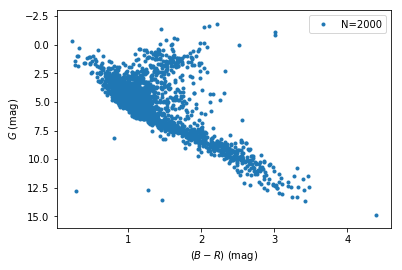

In [42]:
import matplotlib.pyplot as plt

# Convert G magnitude to absolute magnitude (accounting for extinction)
g = data['phot_g_mean_mag'] + 5. - 5.*np.log10(1000./data['parallax']) #- data['a_g_val']
'''
# Correct B-R for reddening
br = data['bp_rp'] - data['e_bp_min_rp_val']
'''
br = data['bp_rp']

plt.plot(br, g, marker='.', linestyle='None', label='N='+str(len(data['bp_rp'])))
plt.xlabel(r'$(B-R)$ (mag)')
plt.ylabel(r'$G$ (mag)')
plt.ylim(16,-3)
plt.legend(loc='best')

### (b) Make an H-R diagram using the effective temperature and luminosity given by Gaia. Remark on the similarities and differences between the CMD and H-R diagram.

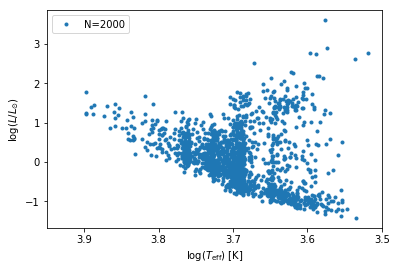

In [25]:
plt.plot(np.log10(data['teff_val']), np.log10(data['lum_val']), marker='.', linestyle='None', label='N='+str(len(data['teff_val'])))
plt.xlabel(r'log($T_{\mathrm{eff}}$) [K]')
plt.ylabel(r'log($L/L_{\odot}$)')
plt.xlim(3.95,3.50)
plt.legend(loc='best')

Similarities: 
- can identify a "main sequence" from bottom right to top left on both plots
- a "branch" of stars above this sequence

Differences:
- no stars below the main sequence on the HR diagram (probably because Gaia hasn't measured temp or luminosity for these stars)
- concentrations of lots of stars with the same effective temps -- possibly an artifact of how Gaia measures temperatures

### (c) Using the data for the effective temperature and BP−RP, find an approximation for temperature given a color, of the form $T = T_{0} − T_{1}(BP − RP)$, and estimate reasonable values of $T_{0}$ and $T_{1}$.

In other words, we want to find a linear relationship between effective temperature and BP-RP: $T = -T_{1}(BP-RP) + T_{0}$

Plot these quantities against each other and fit a line.

T0 = 7096.246842461395
T1 = 1701.2009002734594


Text(0.5, 0, '$(B-R)$ (mag)')

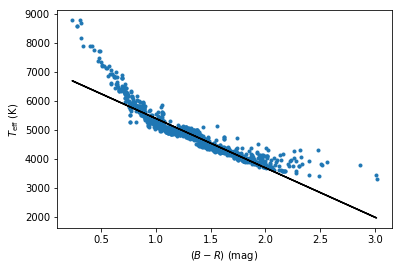

In [55]:
# Clean up data (remove NaNs)
data2 = data[~np.isnan(data['bp_rp'])]
data2 = data2[~np.isnan(data2['teff_val'])]

x = np.asarray(data2['bp_rp'])
y = np.asarray(data2['teff_val'])

# Fit data with linear model
fit = np.polyfit(x,y,1)
T0 = fit[1]
T1 = -1*fit[0]
print('T0 = '+str(fit[1]))
print('T1 = '+str(-1*fit[0]))
fit_fn = np.poly1d(fit) 

# plot the results
plt.plot(x, y, marker='.', linestyle='None')
plt.plot(x, fit_fn(x), '-k')
plt.ylabel(r'$T_{\mathrm{eff}}$ (K)')
plt.xlabel(r'$(B-R)$ (mag)')

### (d) Using the data for MG, luminosity, and effective temperature, find a relationship for luminosity given $M_{G}$ and $BP − RP$, of the form $L = L_{\odot}10^{((M_G−M_0)/M_1)}$, and estimate values of $M_0$ and $M_1$. What should these numbers be if $M_G$ was a bolometric absolute magnitude?

In other words, we want to find a linear relationship between $\log(L/L_{\odot})$ and $M_{G}$: $M_{G} = M_{0} + \log(L/L_{\odot})M_{1}$

Plot these quantities against each other and fit a line.

M0 = 4.859305762769101
M1 = -2.54773050268098


Text(0, 0.5, '$G$ (mag)')

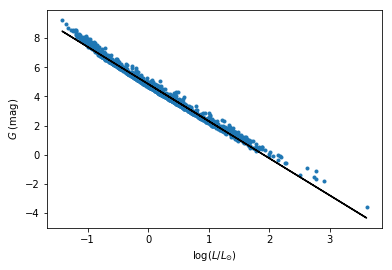

In [64]:
# Clean up data (remove NaNs)
data2 = data[~np.isnan(data['phot_g_mean_mag'])]
data2 = data2[~np.isnan(data2['lum_val'])]

y = data2['phot_g_mean_mag'] + 5. - 5.*np.log10(1000./data2['parallax'])
x = np.asarray(np.log10(data2['lum_val']))

# Fit data with linear model
fit = np.polyfit(x,y,1)
M0 = fit[1]
M1 = fit[0]
print('M0 = '+str(fit[1]))
print('M1 = '+str(fit[0]))
fit_fn = np.poly1d(fit) 

# plot the results
plt.plot(x, y, marker='.', linestyle='None')
plt.plot(x, fit_fn(x), '-k')
plt.xlabel(r'log($L/L_{\odot}$)')
plt.ylabel(r'$G$ (mag)')

If $M_{G}$ was a bolometric magnitude: $M_{\mathrm {bol,\star } }-M_{\mathrm {bol,\odot } }=-2.5\log _{10}\left({\frac {L_{\star }}{L_{\odot }}}\right)$

Solving this for $L/L_{\odot}$, we find $M_{1} = -2.5$ and $M_{2} = 4.74$ is the bolometric magnitude of the Sun.

### (e) Using your relations for luminosity and temperature given $M_G$ and $BP−RP$, derive a relationship using these Gaia parameters to determine the radius of a star. Plot your inferred radius compared to the Gaia measured values for stars where you have a radius measurement, and comment on the difference.

Start with the relationship between luminosity, temperature, and radius: $L = 4\pi R^2 \sigma T^4$

Solve for radius: $R = \left(4\pi\sigma\right)^{-1/2}L^{1/2}T^{-2}$

Plug in our expressions for $L$ and $T$: $R = \left(4\pi\sigma\right)^{-1/2}(L_{\odot}10^{((M_{G}−M_{0})/M_{1})})^{1/2}(T_{0} − T_{1}(BP − RP))^{-2}$

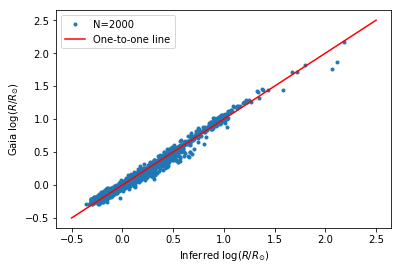

In [68]:
# Define some units in cgs
Rsun = 7.0e10 # cm
Lsun = 4.0e33 # erg s-1
sigma = 0.567e-4 #  erg cm-2 K-4 s-1
pi = np.pi

# Clean up data (remove NaNs)
data2 = data[~np.isnan(data['phot_g_mean_mag'])]
data2 = data2[~np.isnan(data2['bp_rp'])]
data2 = data2[~np.isnan(data2['radius_val'])]

# Define all parameters
g = data['phot_g_mean_mag'] + 5. - 5.*np.log10(1000./data['parallax'])
bprp = data['bp_rp']

# Infer radius from MG, BP-RP
r_infer = (4.*pi*sigma)**(-0.5) * (Lsun * 10**((g-M0)/M1))**(0.5) * (T0 - T1*bprp)**(-2.)

# Convert to solar radius
r_infer = r_infer/Rsun

# Plot against actual radius
plt.plot(np.log10(r_infer), np.log10(data['radius_val']), marker='.', linestyle='None', label='N='+str(len(data['radius_val'])))
plt.xlabel(r'Inferred $\log(R/R_{\odot})$')
plt.ylabel(r'Gaia $\log(R/R_{\odot})$')
plt.plot([-0.5,2.5],[-0.5,2.5],'r-',label='One-to-one line')
plt.legend(loc='best')

Inferred radius tends to overpredict the true measured radius -- probably because the relationship between Teff, BP-RP isn't a perfect line (we tend to underpredict Teff and therefore overpredict radius)